In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1699,2020-09-20,United Kingdom,388485.0,390358.0,41780.0,41759.0,-1873.0,21.0
1700,2020-09-20,Germany,271709.0,271415.0,9395.0,9386.0,294.0,9.0
1701,2020-09-20,Iran,419331.0,419043.0,24177.0,24118.0,288.0,59.0
1702,2020-09-20,Turkey,301085.0,301348.0,7430.0,7445.0,-263.0,-15.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10402.862089201877
RMSE =  38481.287392655235


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  310.75704225352115
RMSE =  771.8461695115623


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  75576.58385093168
RMSE =  121435.84639129497
-- World performances for deaths --
MAE =  1819.527950310559
RMSE =  2206.460362026145


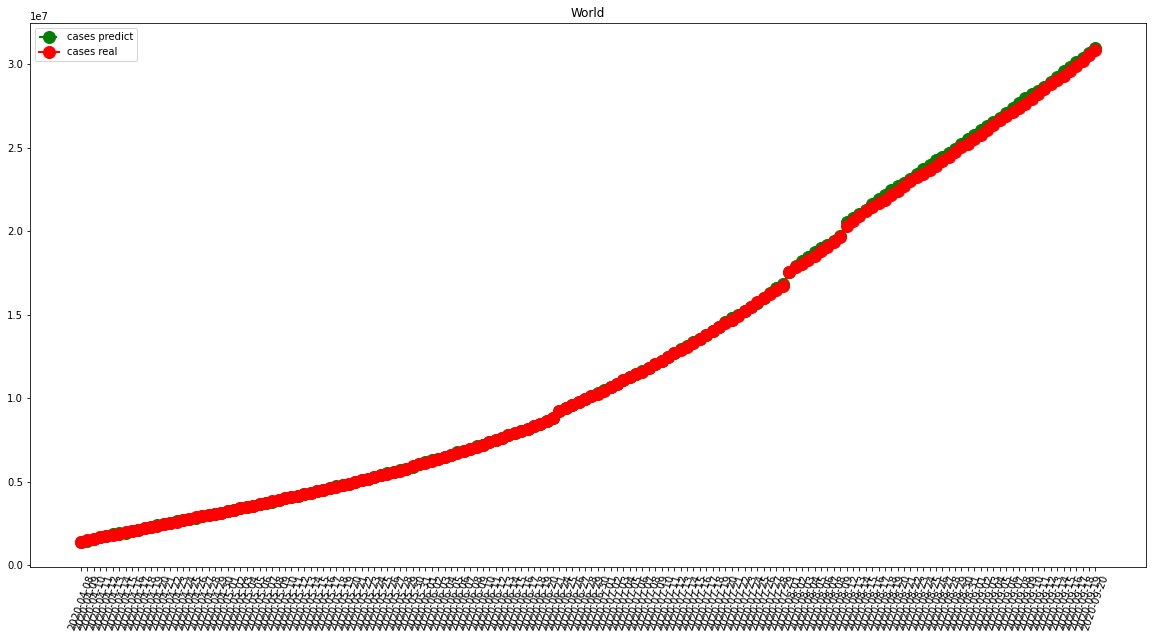

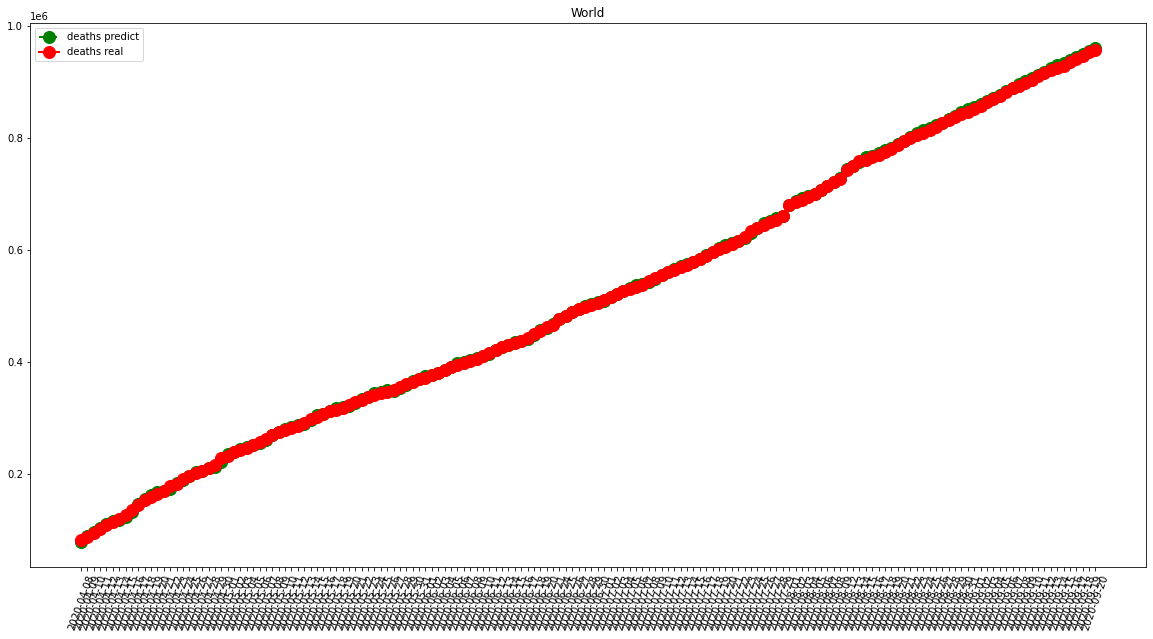

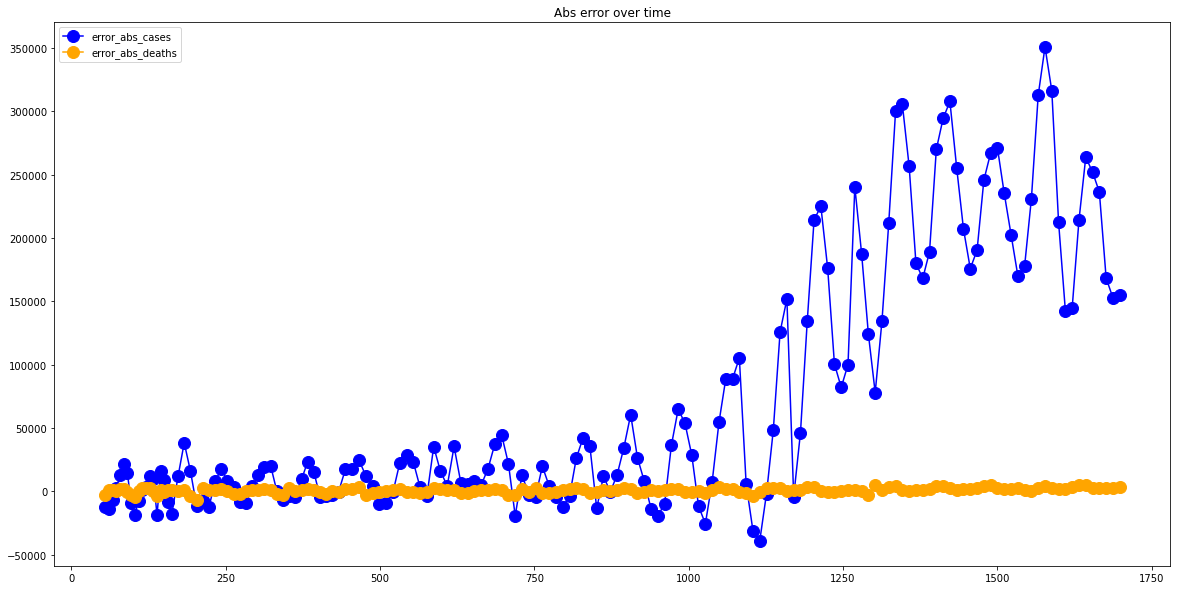

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1158.6666666666667
RMSE =  1699.8755372394955
-- France performances for deaths --
MAE =  111.9298245614035
RMSE =  256.7805625625536


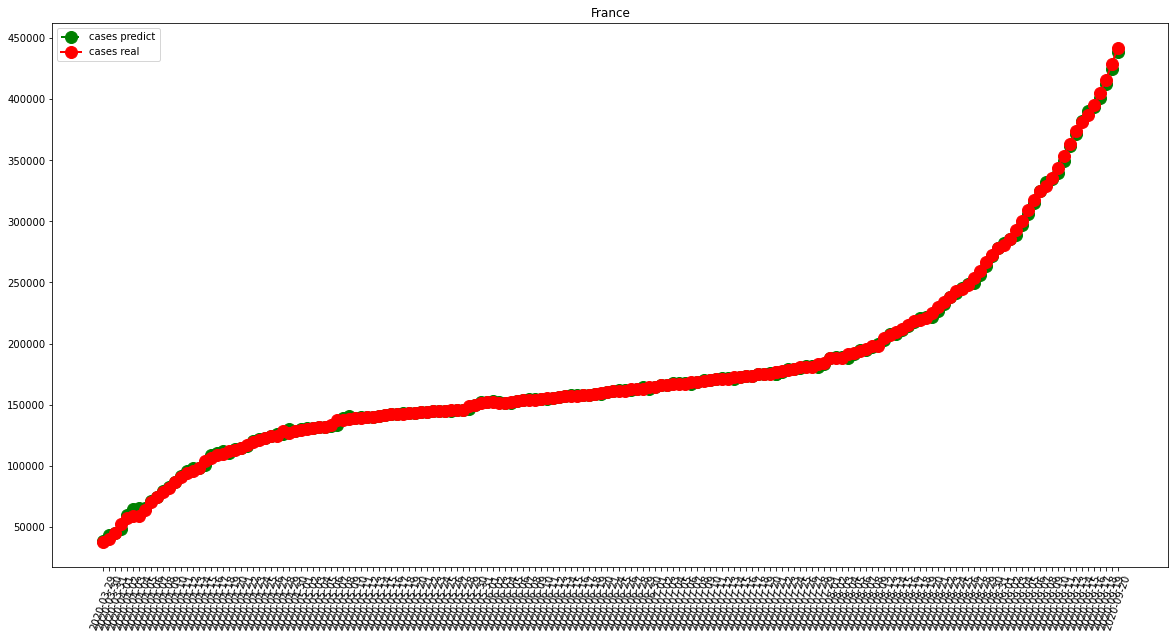

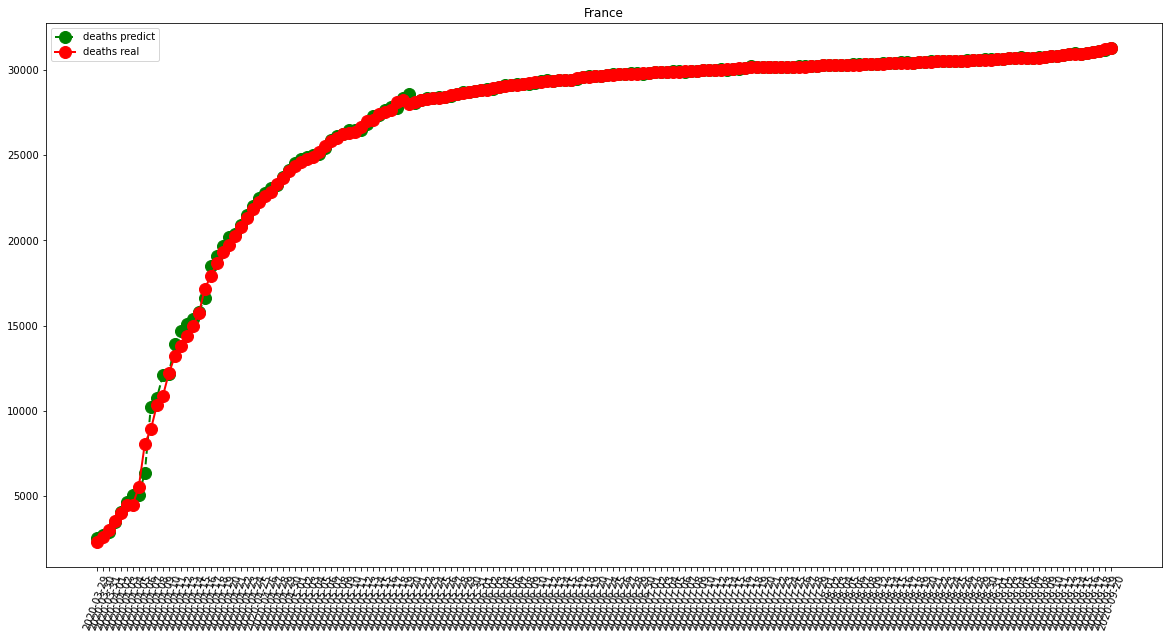

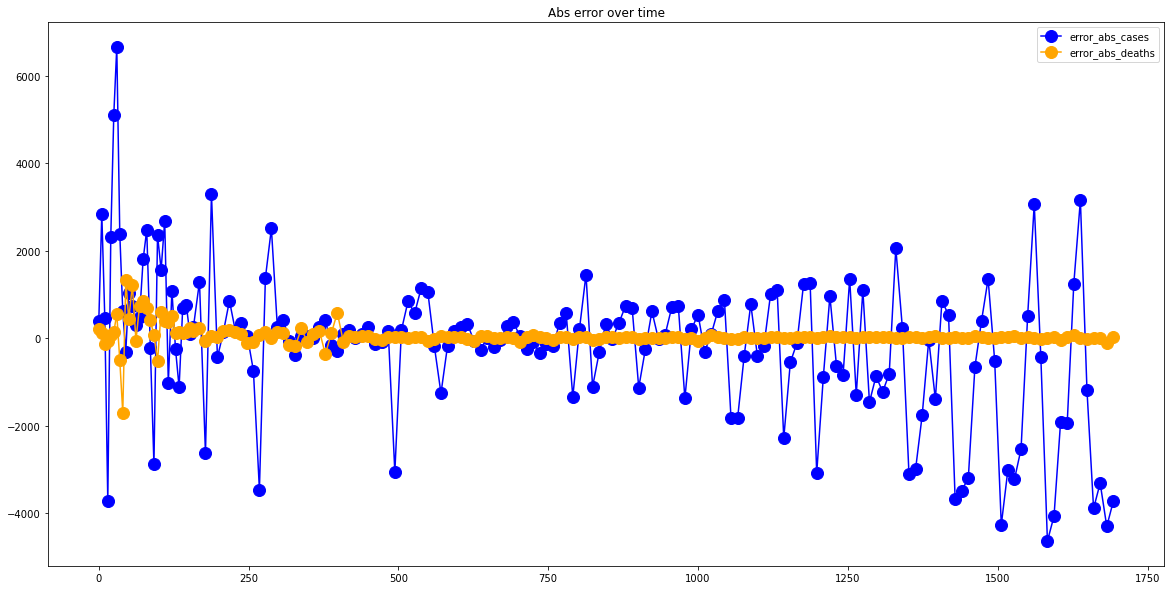

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.4269005847953
RMSE =  448.3873834242385
-- Italy performances for deaths --
MAE =  67.00584795321637
RMSE =  227.07924268003967


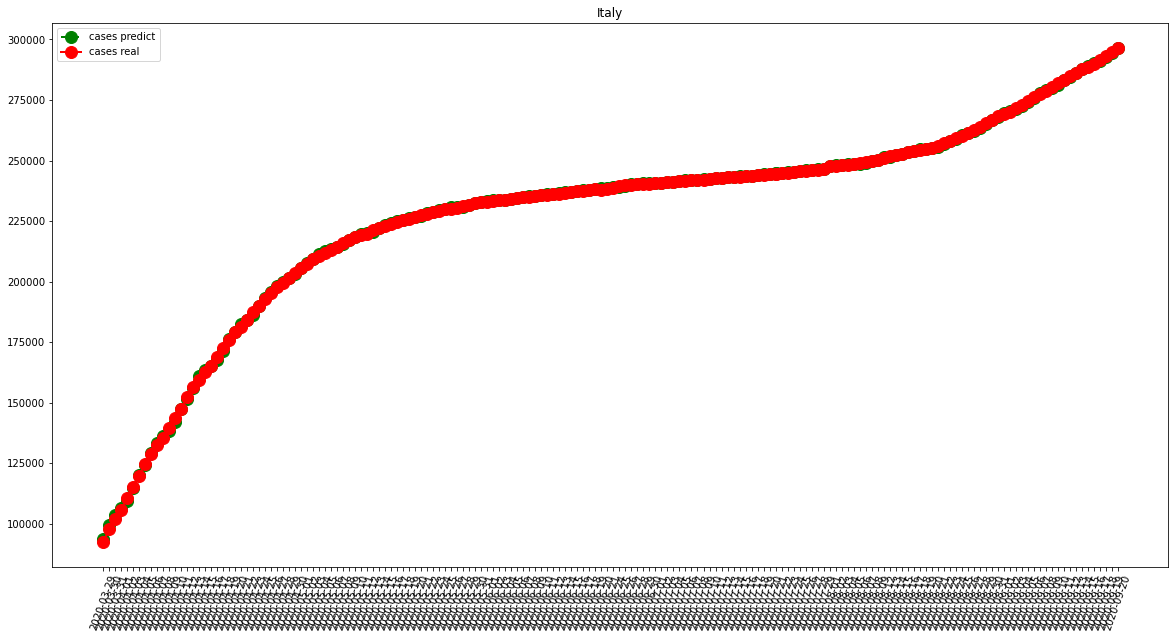

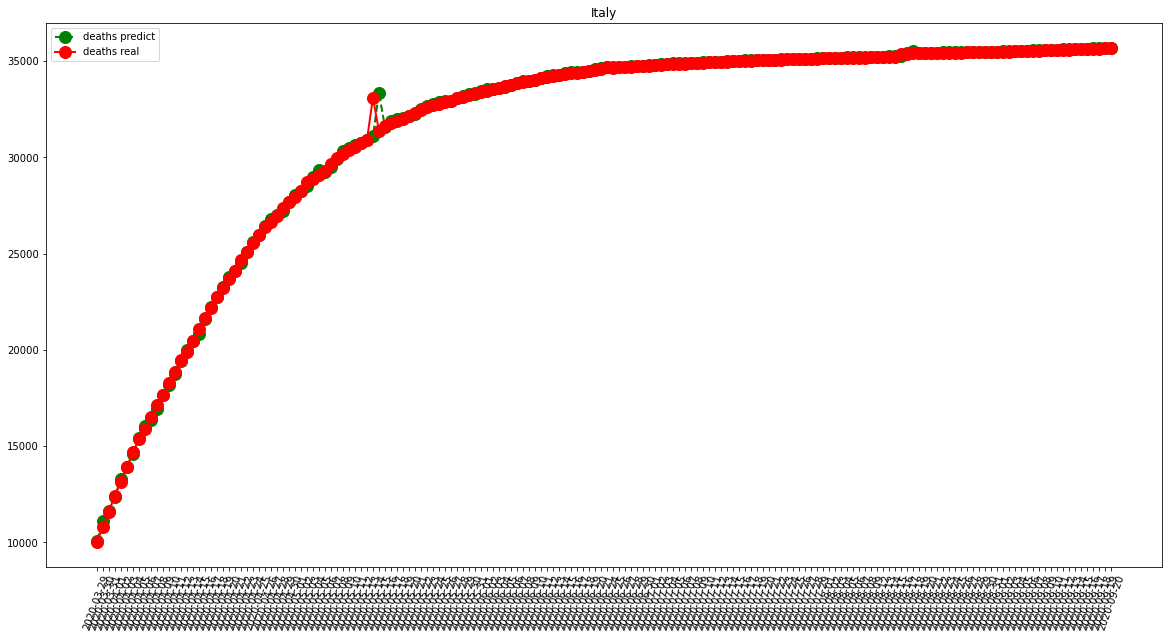

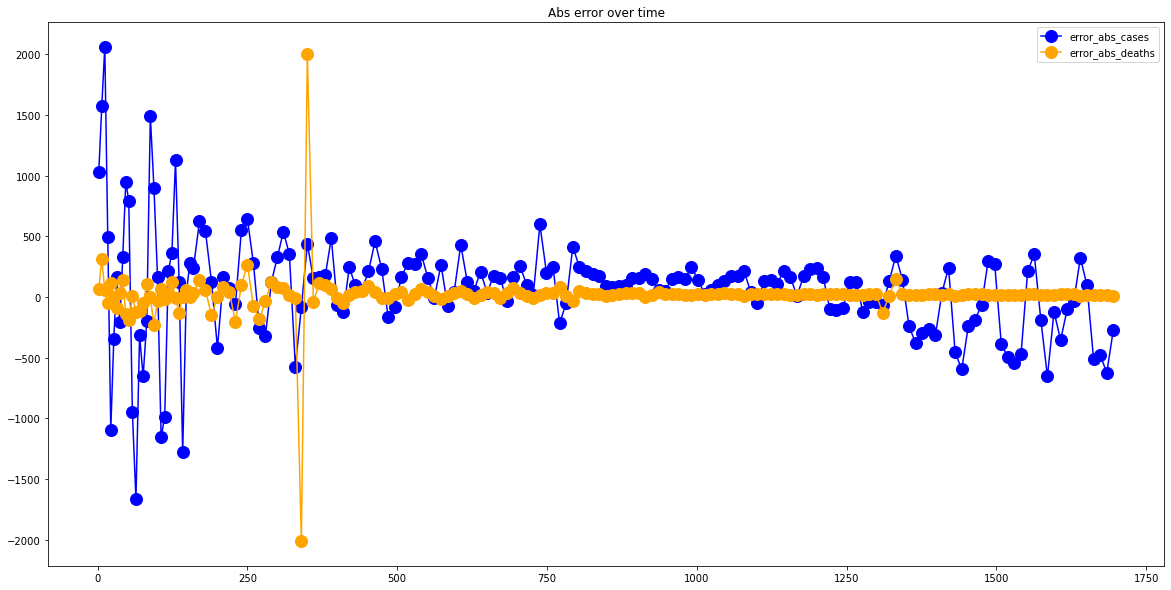

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2519.941520467836
RMSE =  4866.68658251152
-- Spain performances for deaths --
MAE =  120.41520467836257
RMSE =  312.1253777923037


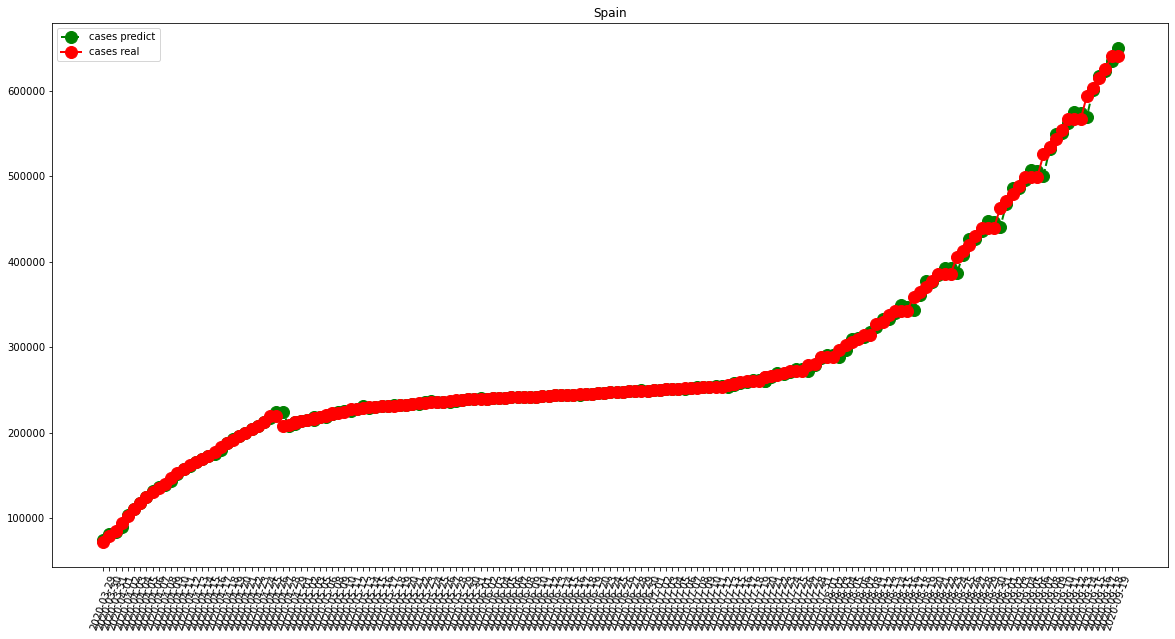

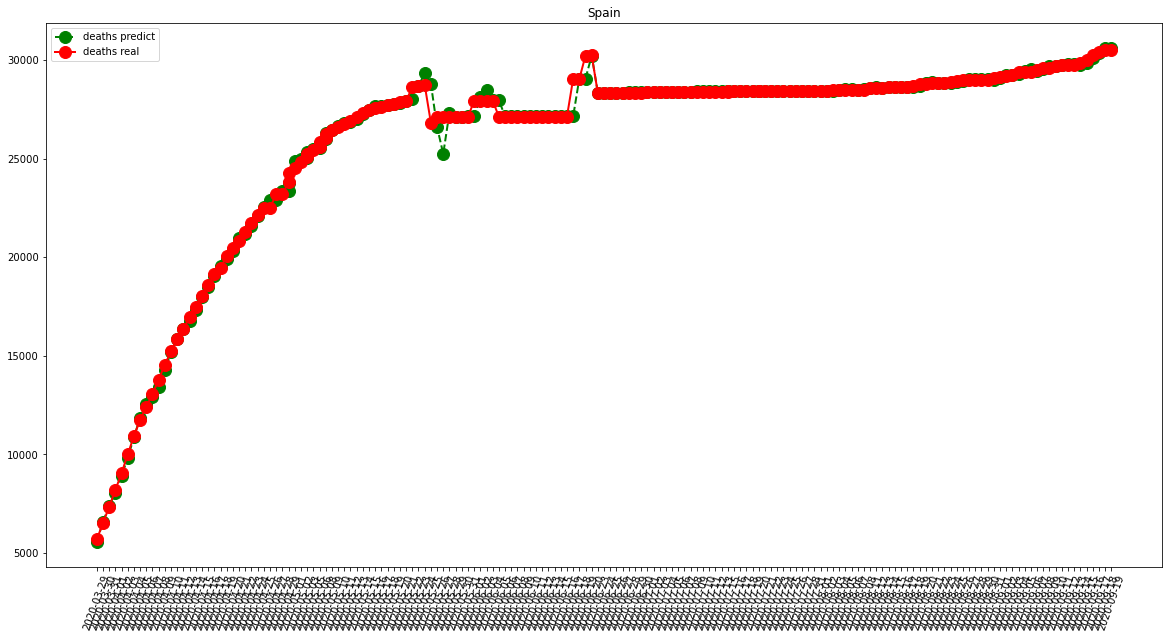

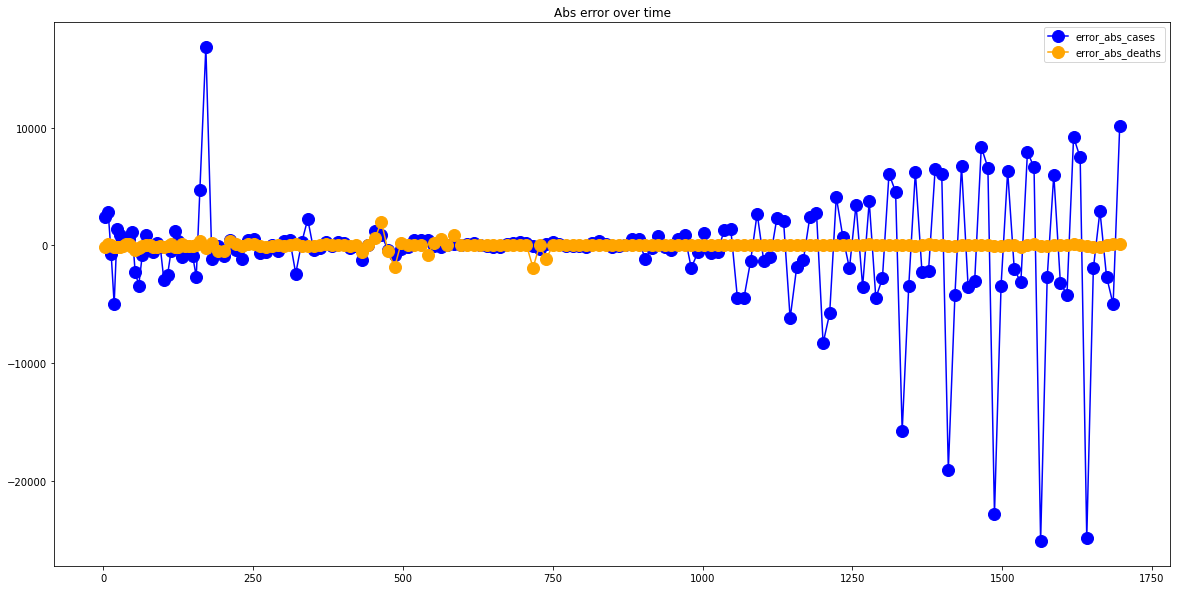

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15422.894736842105
RMSE =  22974.54528411163
-- United States performances for deaths --
MAE =  480.08187134502924
RMSE =  672.533161859822


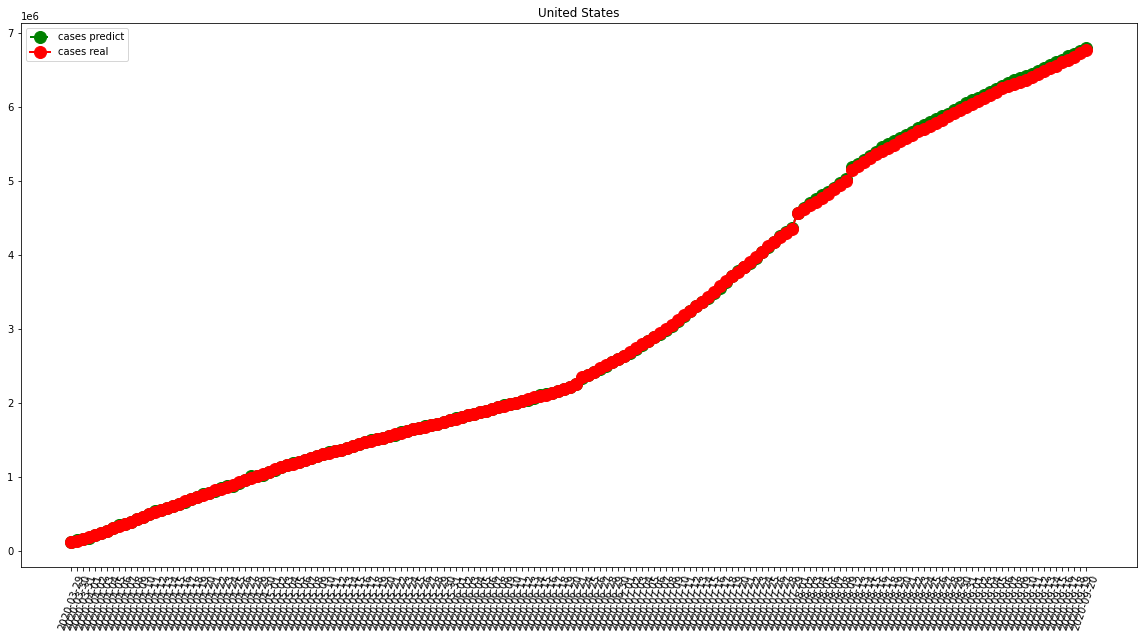

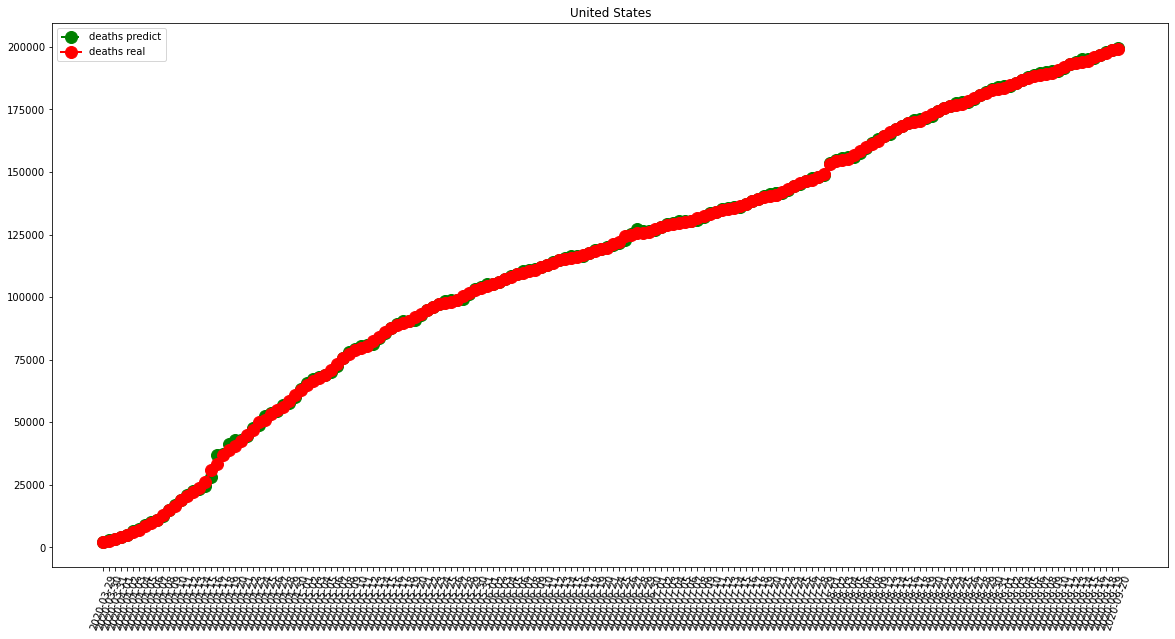

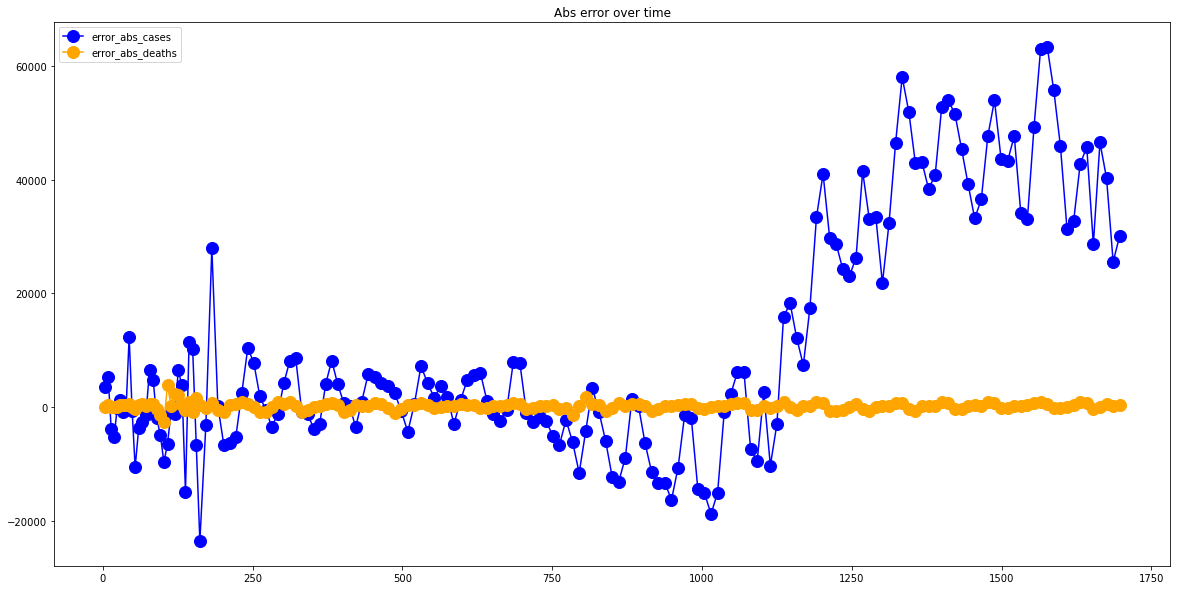

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  59.52046783625731
RMSE =  91.31770899780713
-- China performances for deaths --
MAE =  24.91812865497076
RMSE =  120.0906821107473


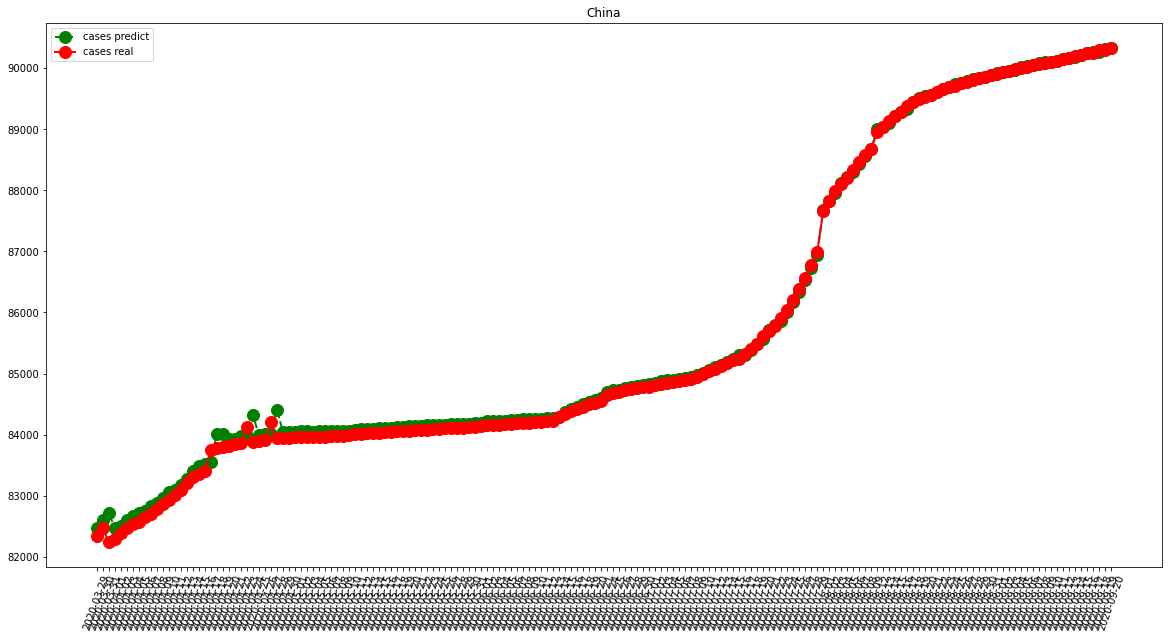

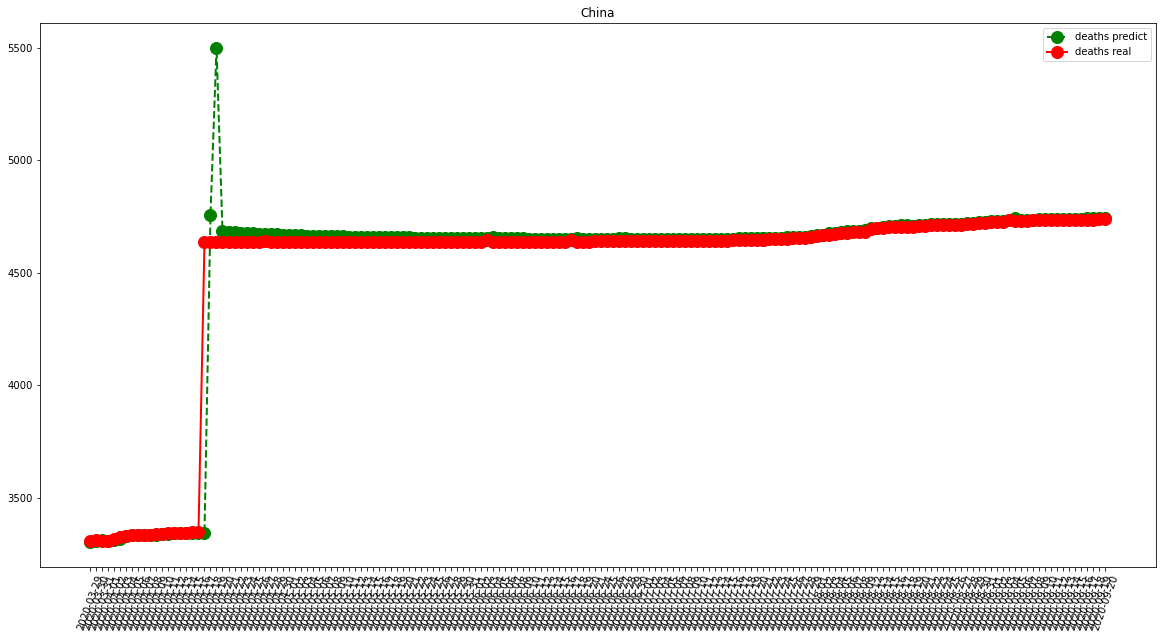

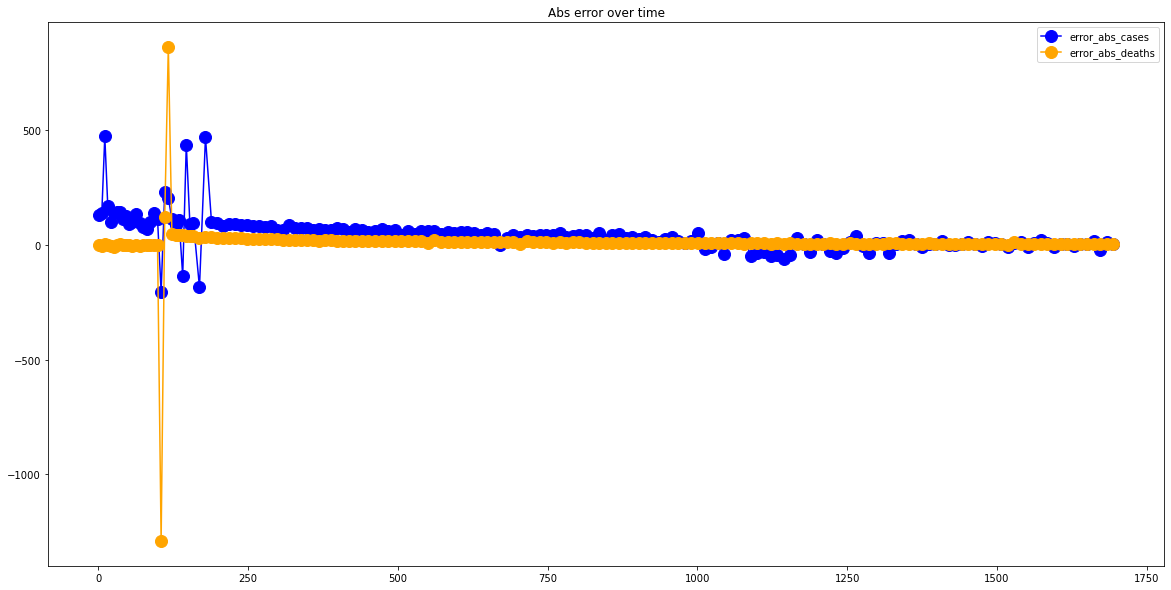

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1023.0629370629371
RMSE =  3514.658990312121
-- United Kingdom performances for deaths --
MAE =  215.32167832167832
RMSE =  713.746781801129


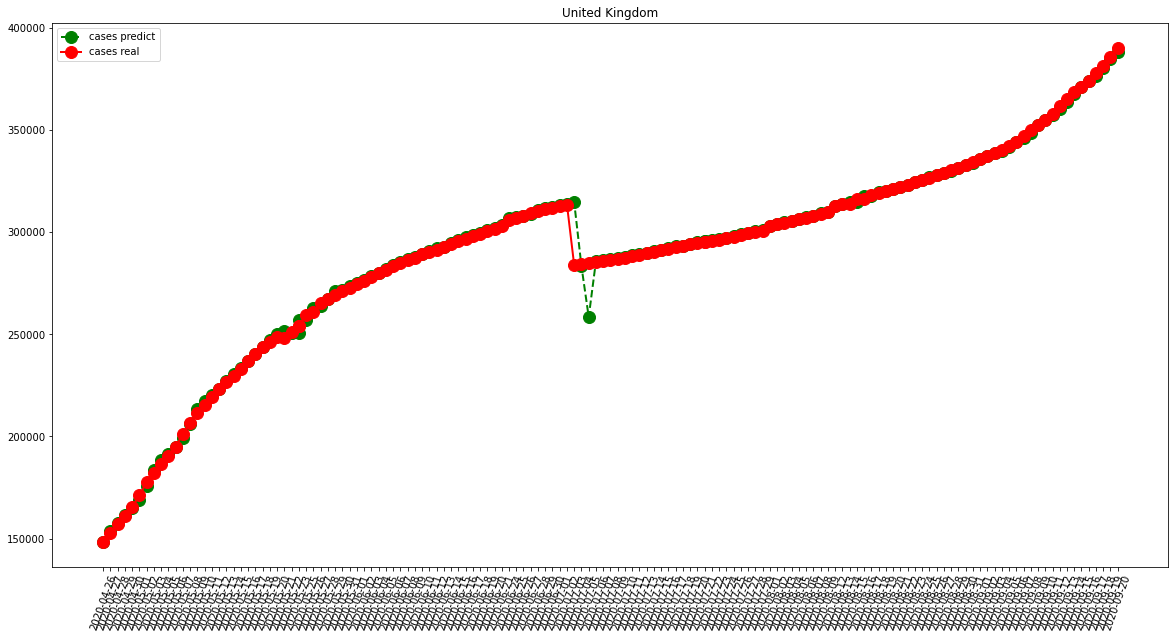

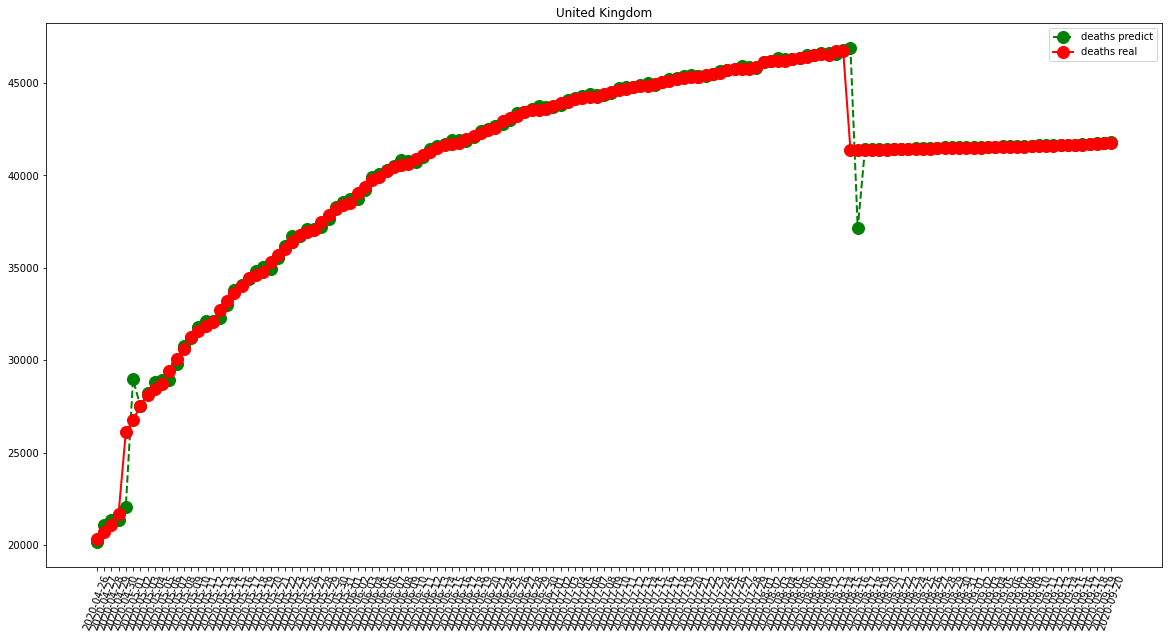

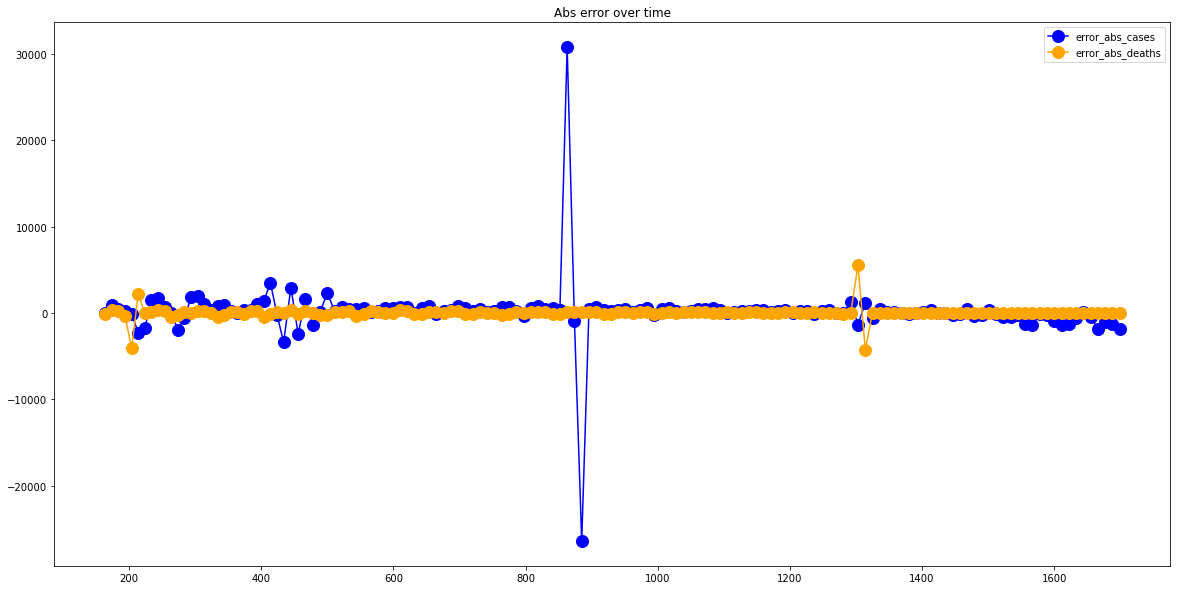

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  412.3706293706294
RMSE =  581.8054188941054
-- Germany performances for deaths --
MAE =  19.034965034965033
RMSE =  36.84820497378685


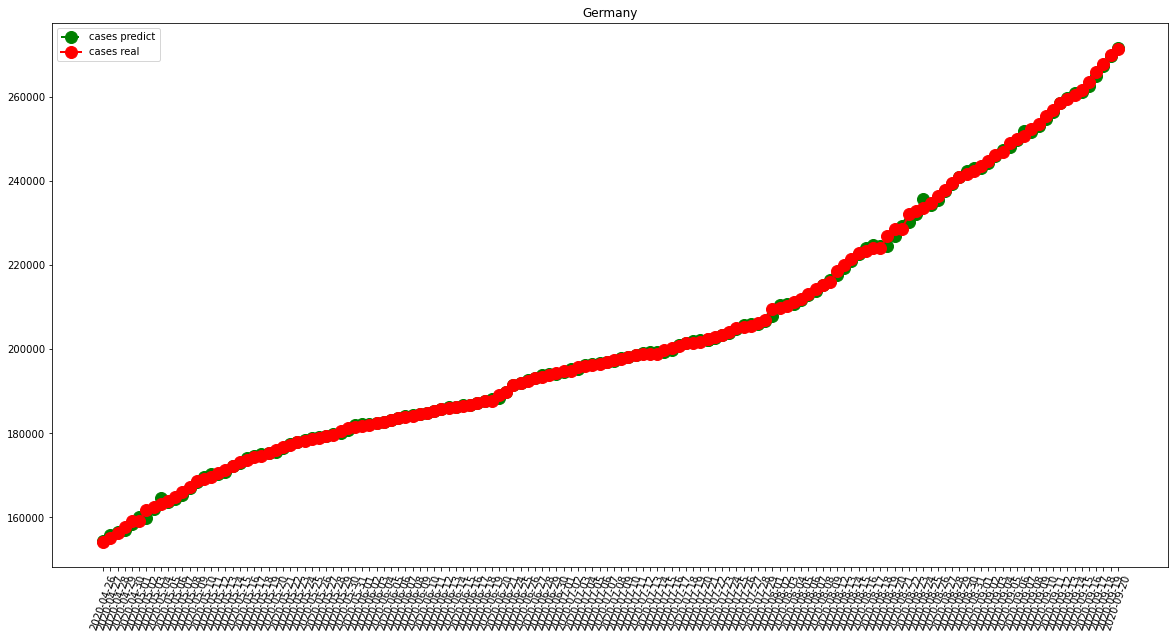

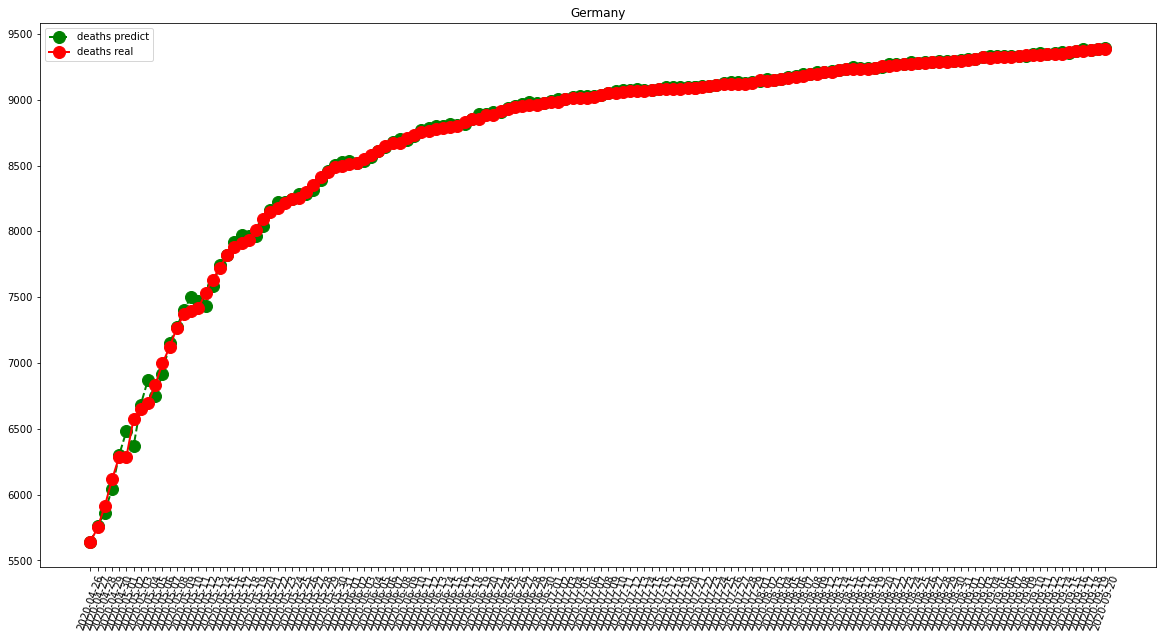

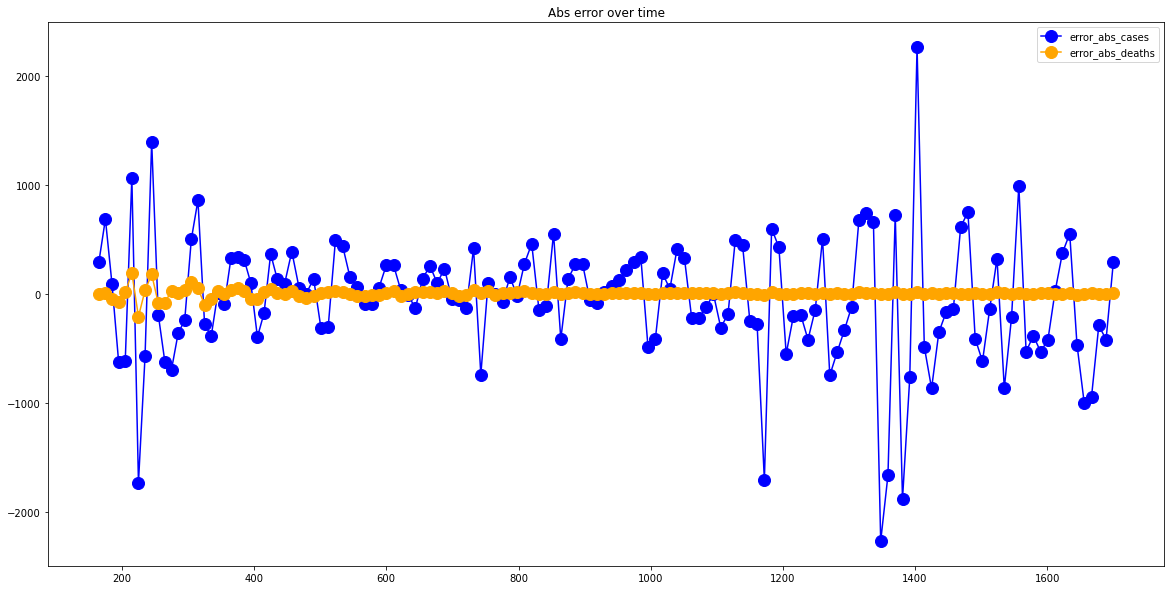

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  877.4755244755245
RMSE =  1233.3834611497603
-- Iran performances for deaths --
MAE =  52.03496503496503
RMSE =  85.64396132762725


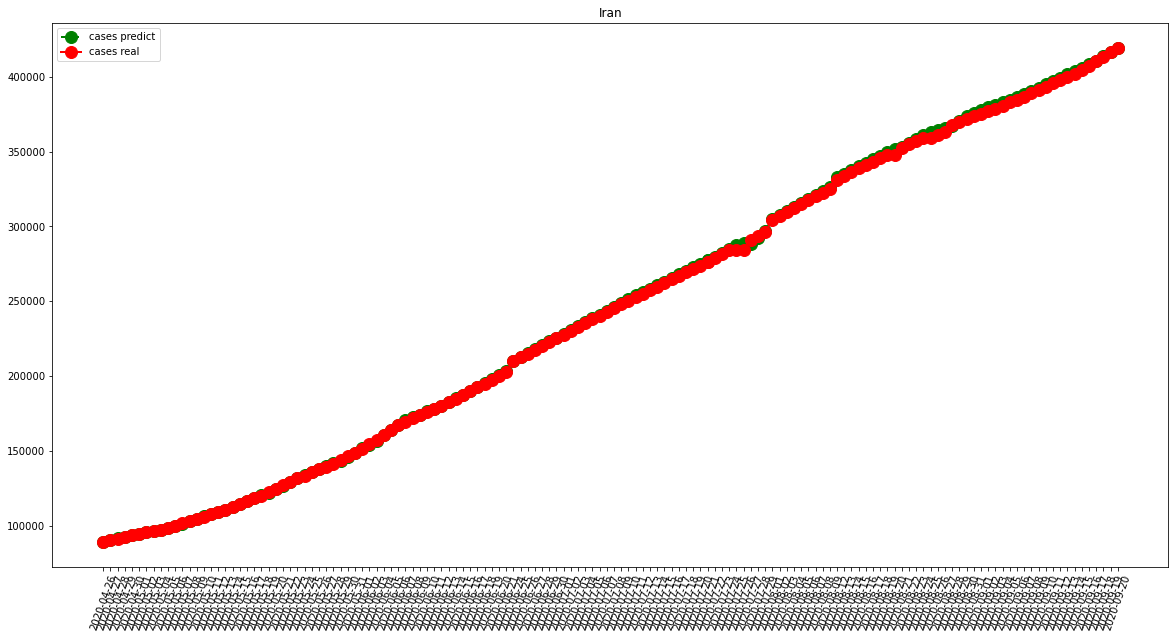

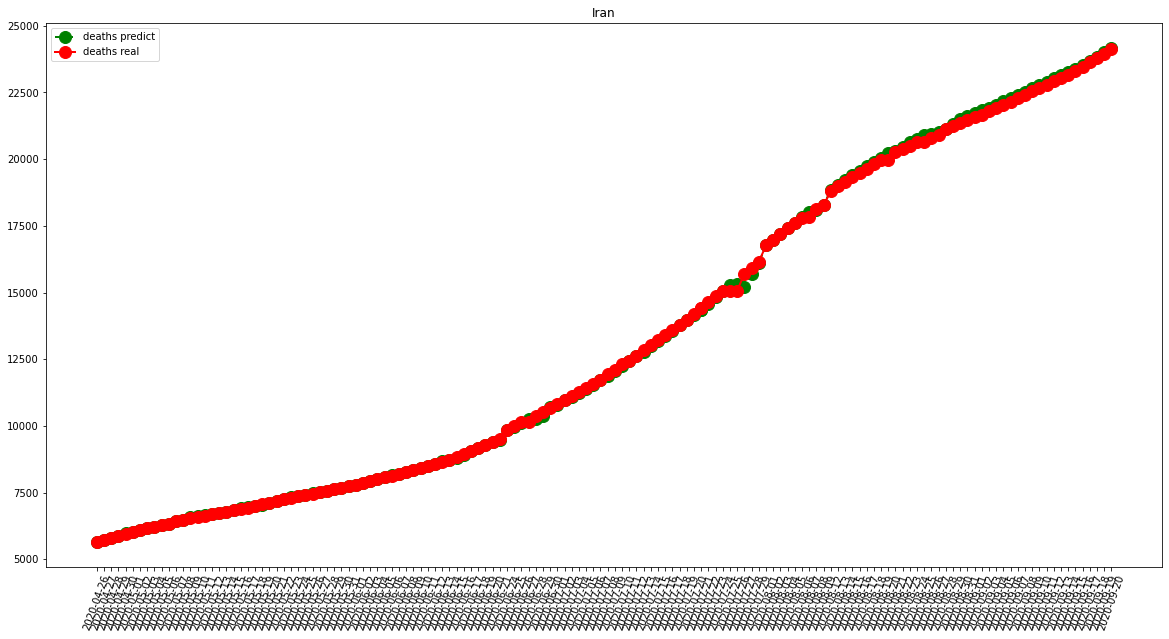

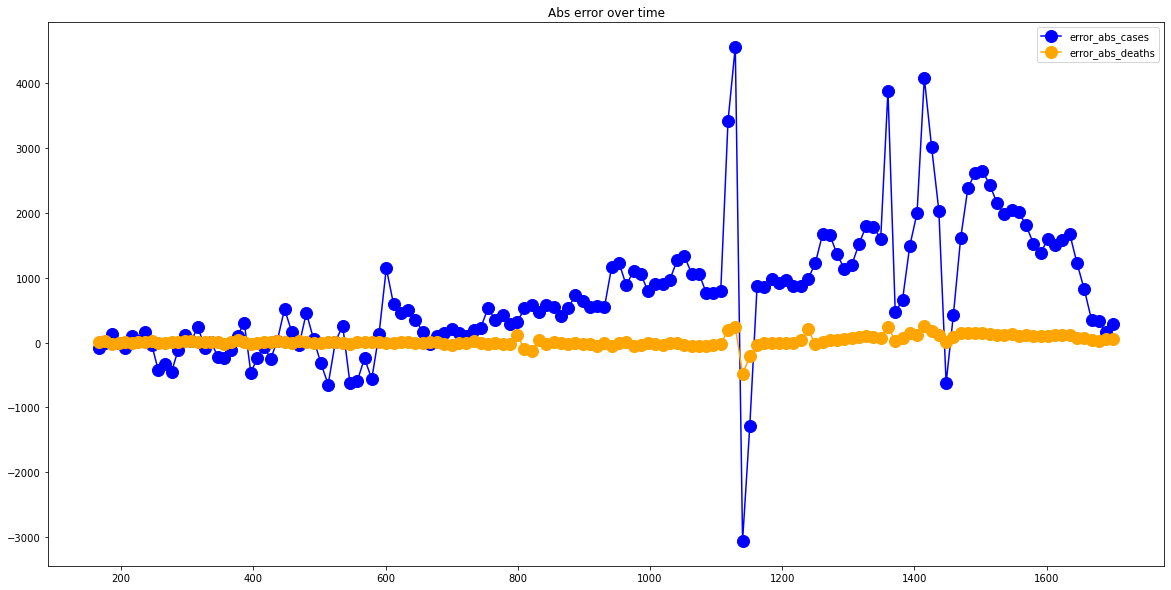

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  220.35664335664336
RMSE =  329.917843131867
-- Turkey performances for deaths --
MAE =  15.923076923076923
RMSE =  85.09751707651294


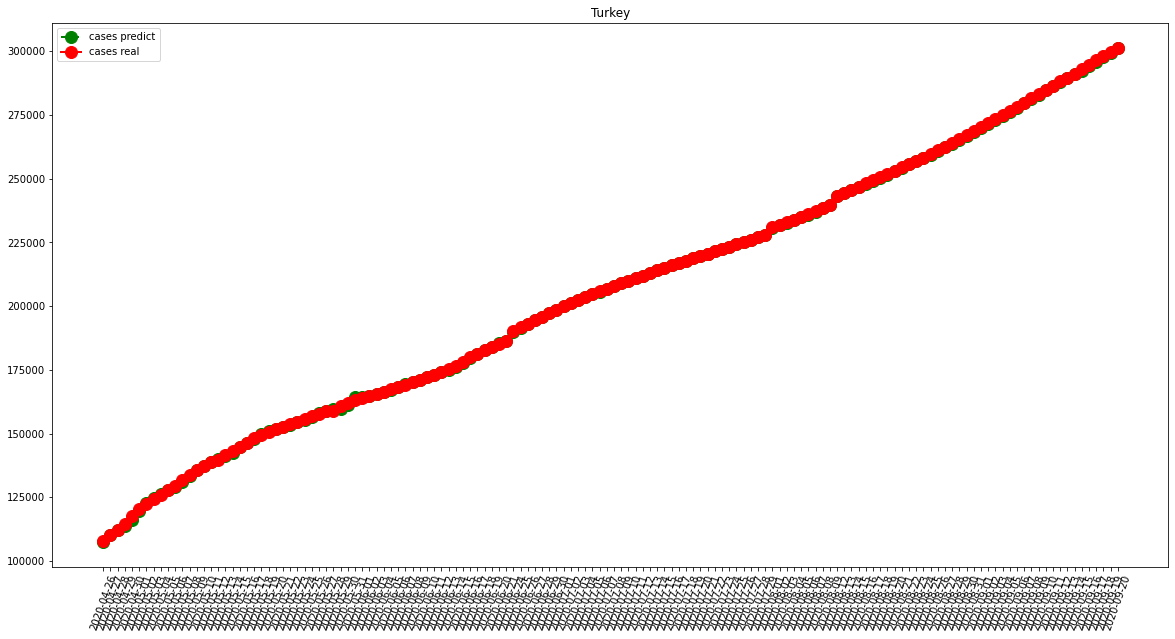

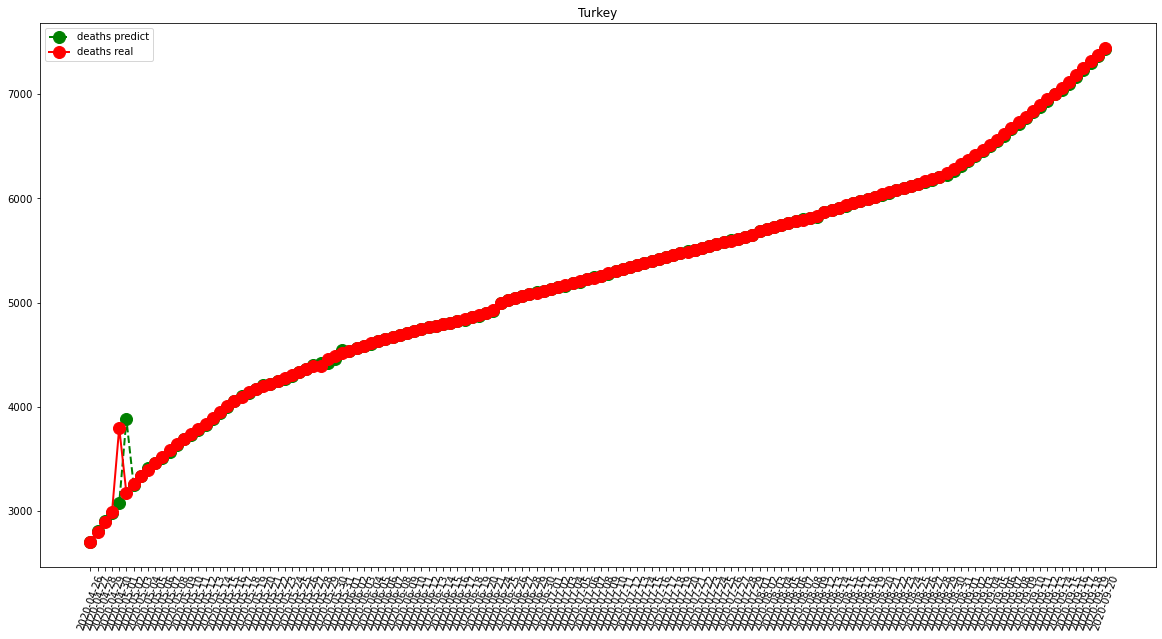

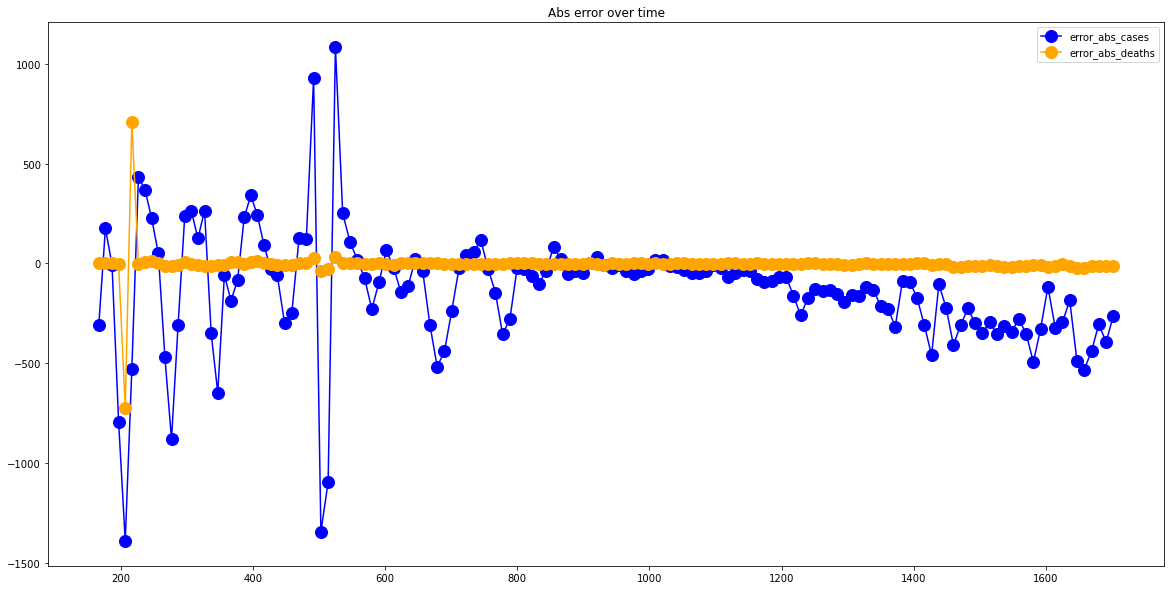

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16098.758620689656
RMSE =  21213.09784559758
-- Brazil performances for deaths --
MAE =  481.12931034482756
RMSE =  584.5687844840019


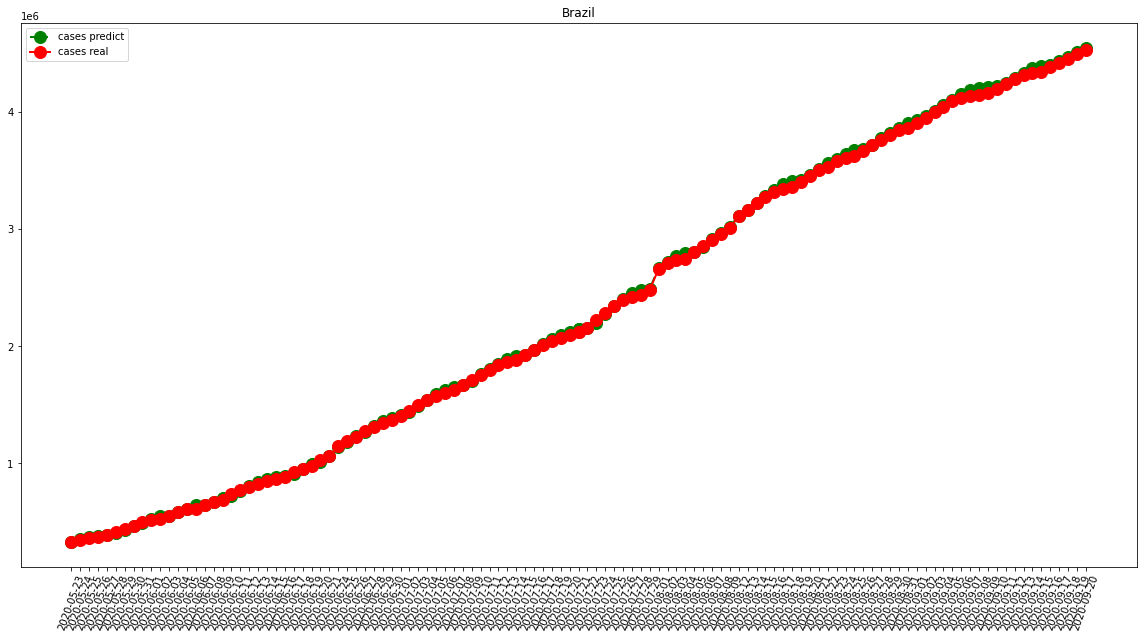

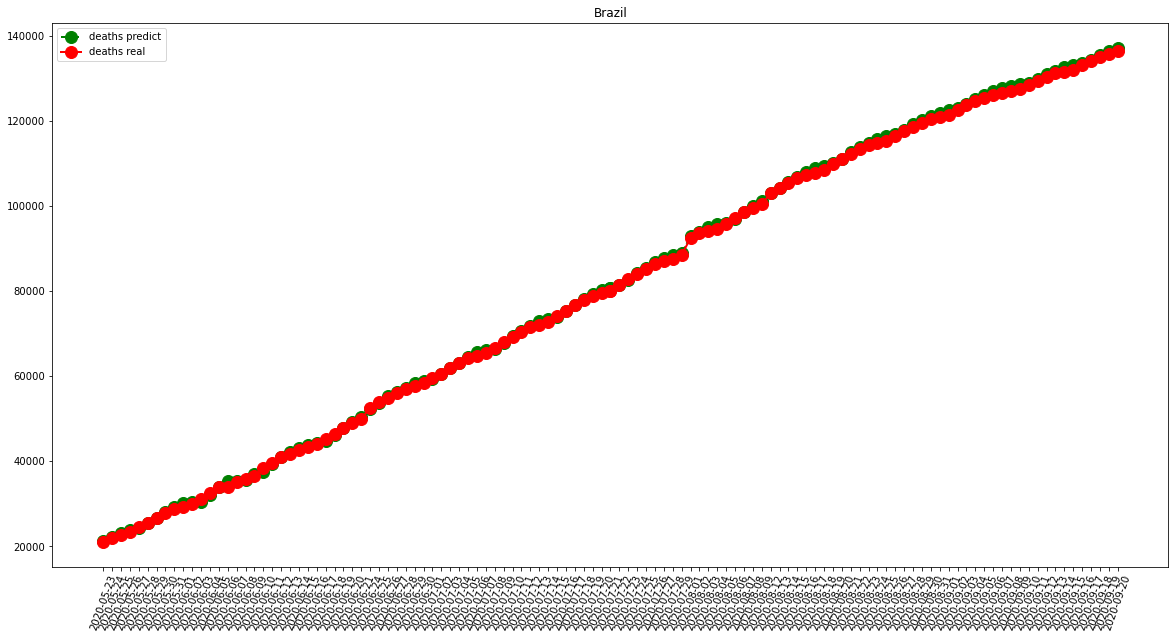

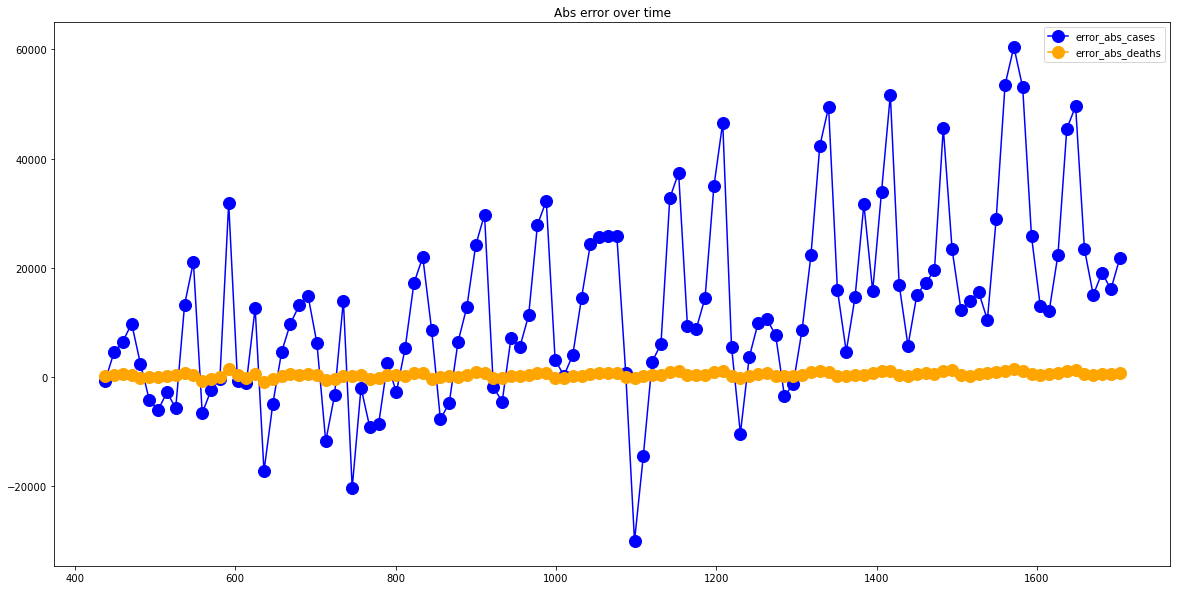

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)